# Compare NUOPC versus MCT (G-compset)

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.m6plot import xycompare
from mom6_tools.MOM6grid import MOM6grid

In [18]:
grd = MOM6grid('/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.mct/run/g.c2b6.GNYF.T62_t061.mct.mom6.static.nc')

MOM6 grid successfully loaded... 



## MCT cases

In [22]:
g1_mct = xr.open_mfdataset("/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.mct/run/g.c2b6.GNYF.T62_t061.mct.cpl.hi.*.nc", decode_times=False)
g1_mct_short = xr.open_mfdataset("/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.mct.short/run/g.c2b6.GNYF.T62_t061.mct.short.cpl.hi.*.nc", decode_times=False)

# NUOPC cases

In [20]:
g1_npc = xr.open_mfdataset("/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.nuopc/run/g.c2b6.GNYF.T62_t061.nuopc.cpl.hi.*.nc", decode_times=False)
g1_npc_short = xr.open_mfdataset("/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.nuopc.short/run/g.c2b6.GNYF.T62_t061.nuopc.short.cpl.hi.*.nc", decode_times=False)

In [6]:
#g1_npc
#g1_mct

### Corresponding variable names in NUOPC and MCT

In [7]:
pairs = [
("ocnExp_Faxa_rain", "x2oacc_Faxa_rain"),
("ocnExp_Faxa_snow", "x2oacc_Faxa_snow"),
("ocnExp_Fioi_melth", "x2oacc_Fioi_melth"),
("ocnExp_Fioi_meltw", "x2oacc_Fioi_meltw"),
("ocnExp_Fioi_salt", "x2oacc_Fioi_salt"),
("ocnExp_Foxx_evap", "x2oacc_Foxx_evap"),
("ocnExp_Foxx_rofi", "x2oacc_Foxx_rofi"),
("ocnExp_Foxx_rofl", "x2oacc_Foxx_rofl"),
("ocnExp_Foxx_sen", "x2oacc_Foxx_sen"),
("ocnExp_Foxx_taux", "x2oacc_Foxx_taux"),
("ocnExp_Foxx_tauy", "x2oacc_Foxx_tauy"),
("ocnExp_Sa_pslv", "x2oacc_Sa_pslv"),
("ocnImp_So_s", "o2x_So_s"),
("ocnImp_So_t", "o2x_So_t"),
("ocnImp_So_u", "o2x_So_u"),
("ocnImp_So_v", "o2x_So_v"),
("ocnImp_So_dhdx", "o2x_So_dhdx"),
("ocnImp_So_dhdy", "o2x_So_dhdy"),
("ocnImp_So_bldepth", "o2x_So_bldepth"),
#("ocnImp_So_fswpen", "x2oacc_Foxx_swnet"),
("ocnImp_Fioo_q", "o2x_Fioo_q")
]    

MCT time (days) =  0.041666666666666664
NUOPC time (days) =  0.041666666666666664


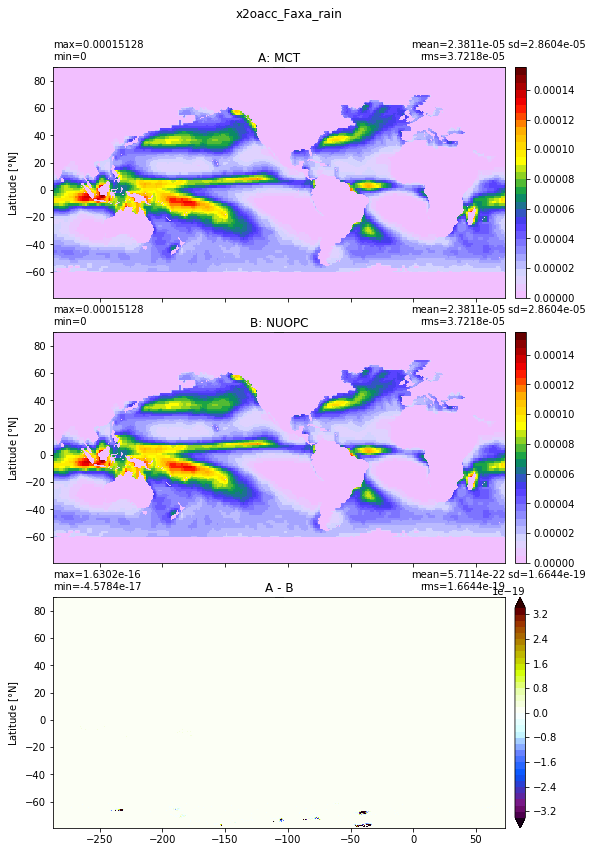

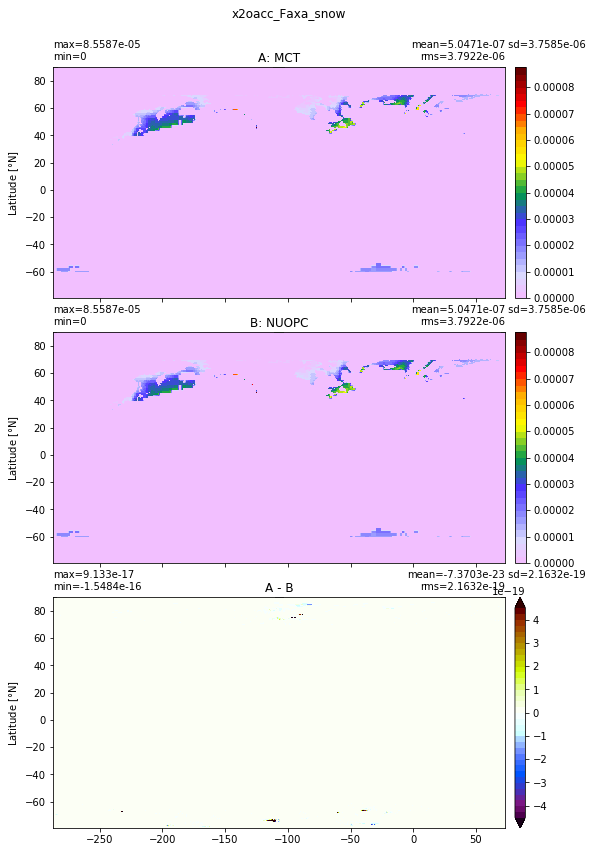

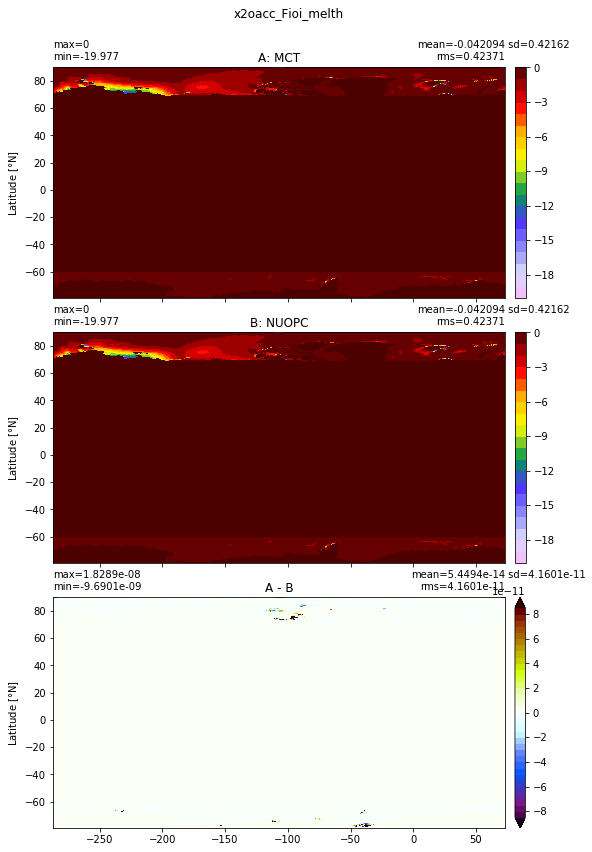

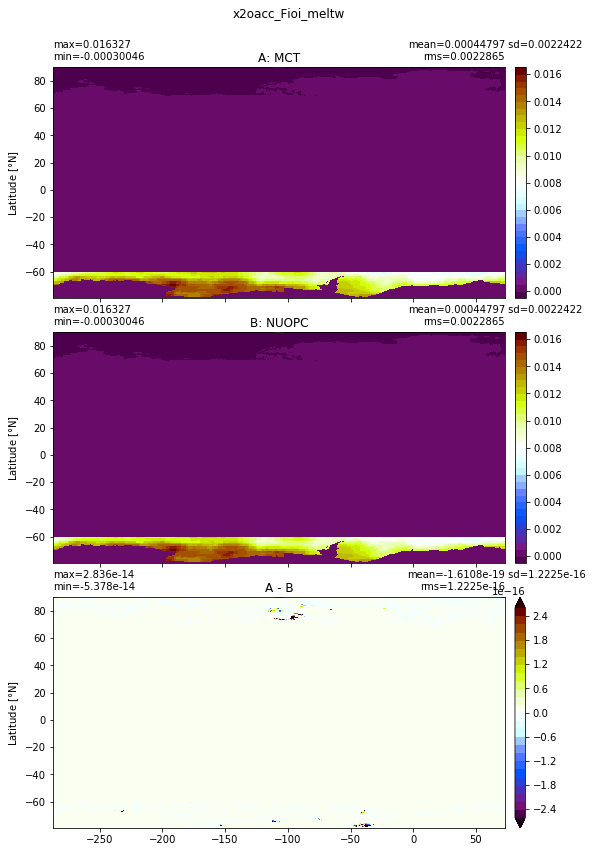

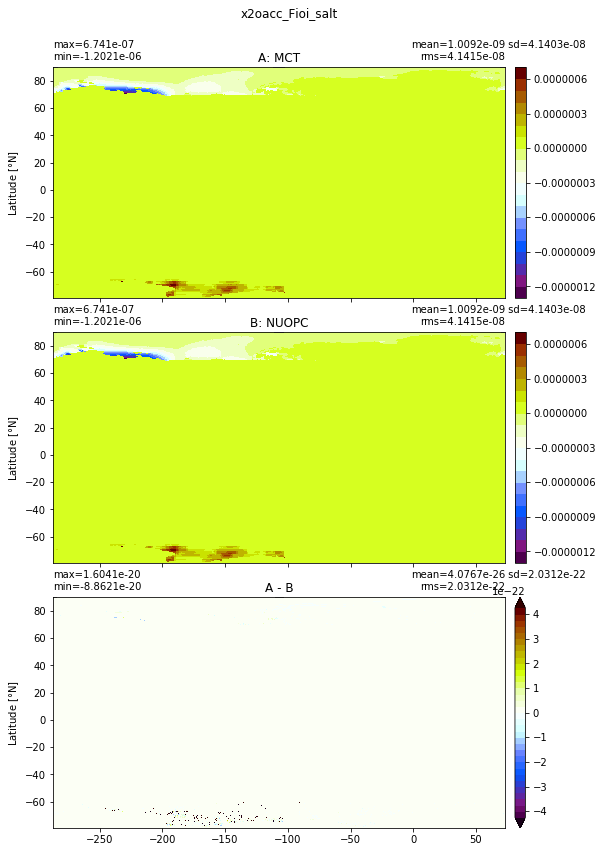

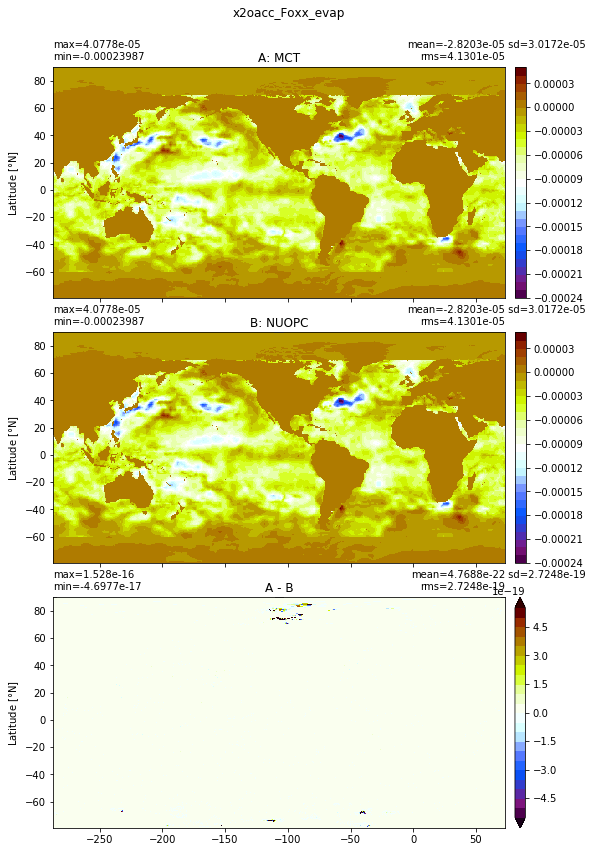

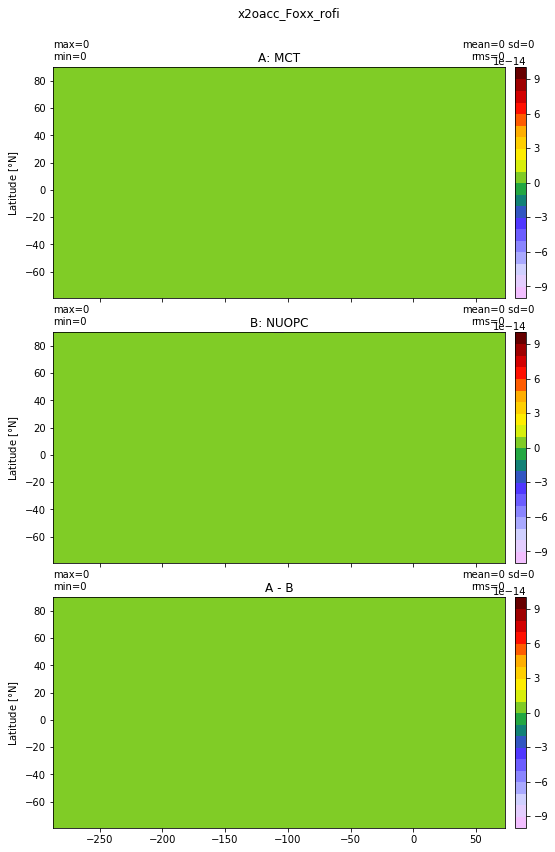

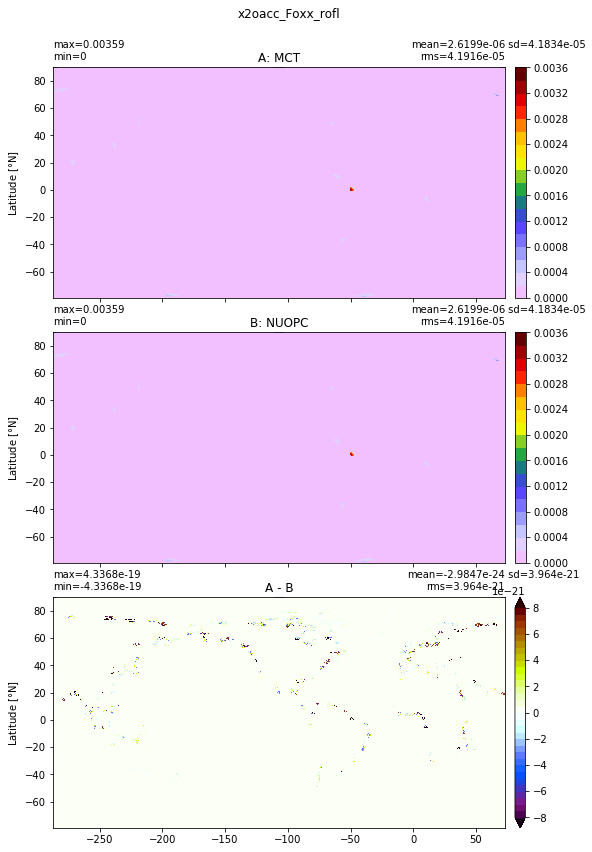

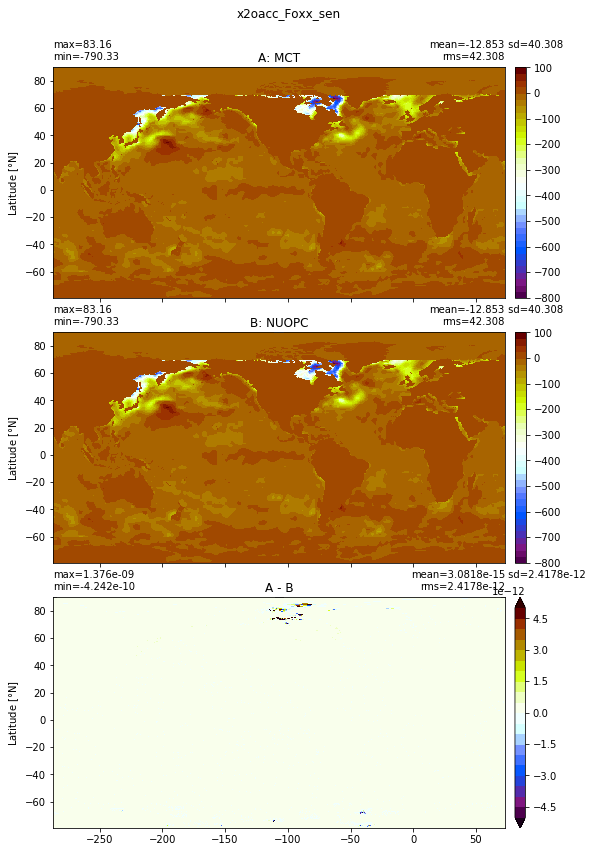

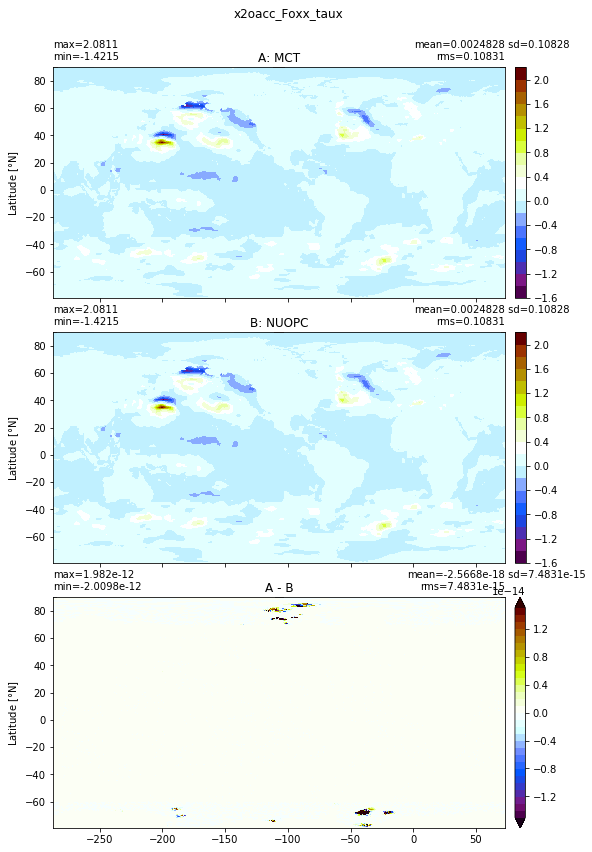

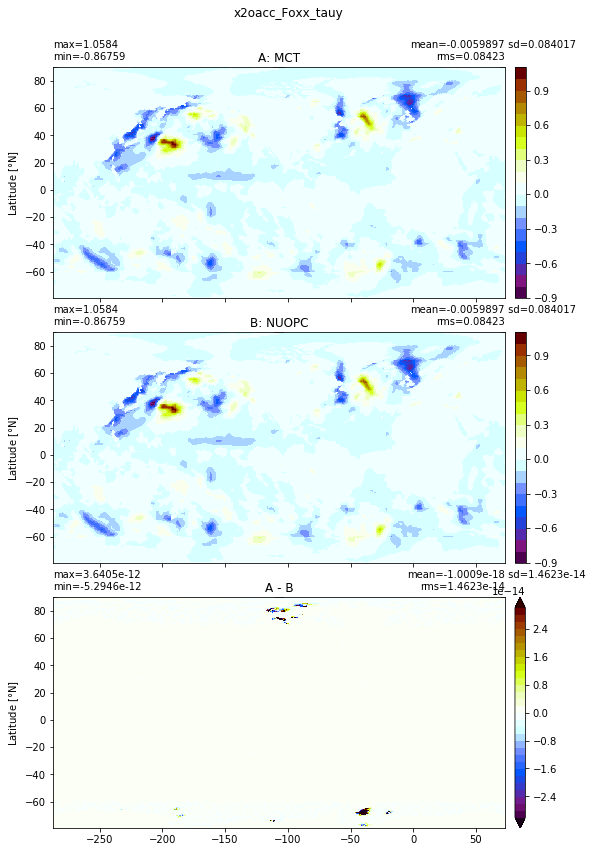

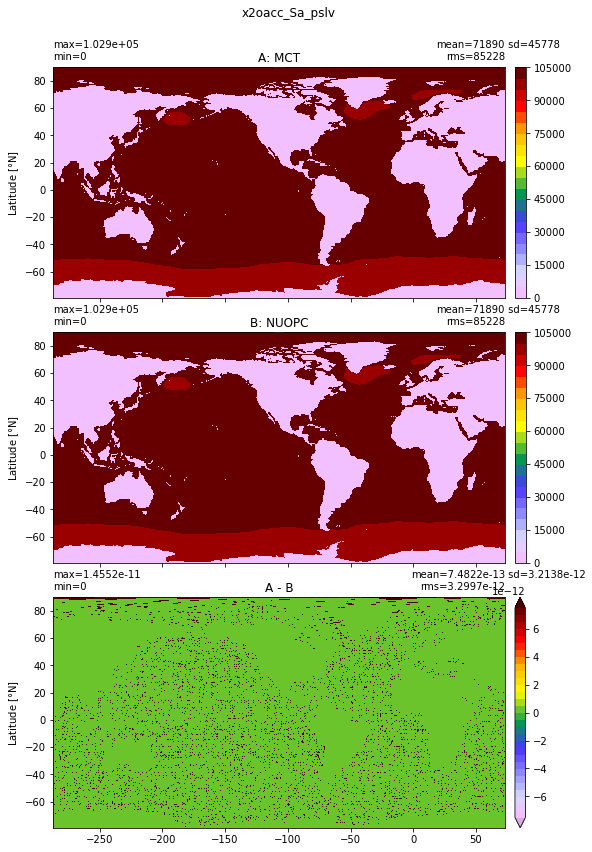

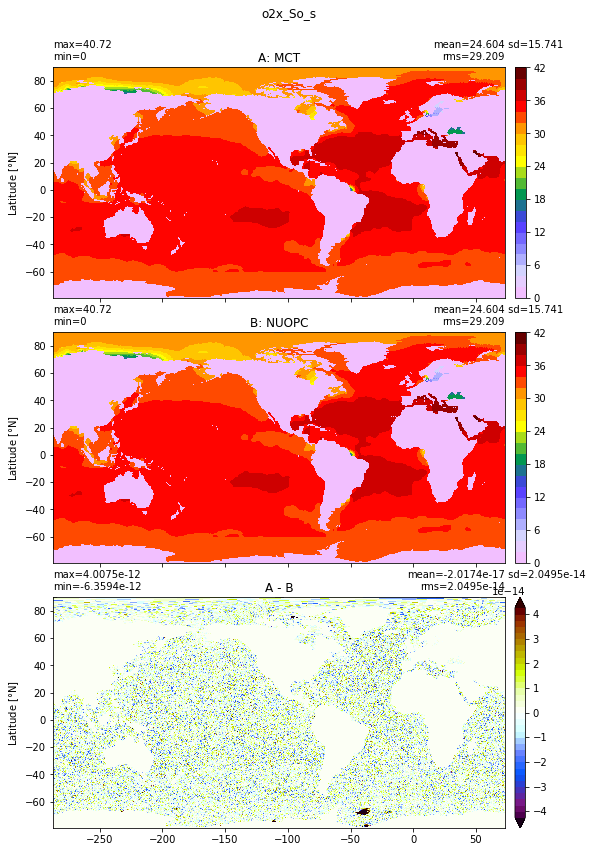

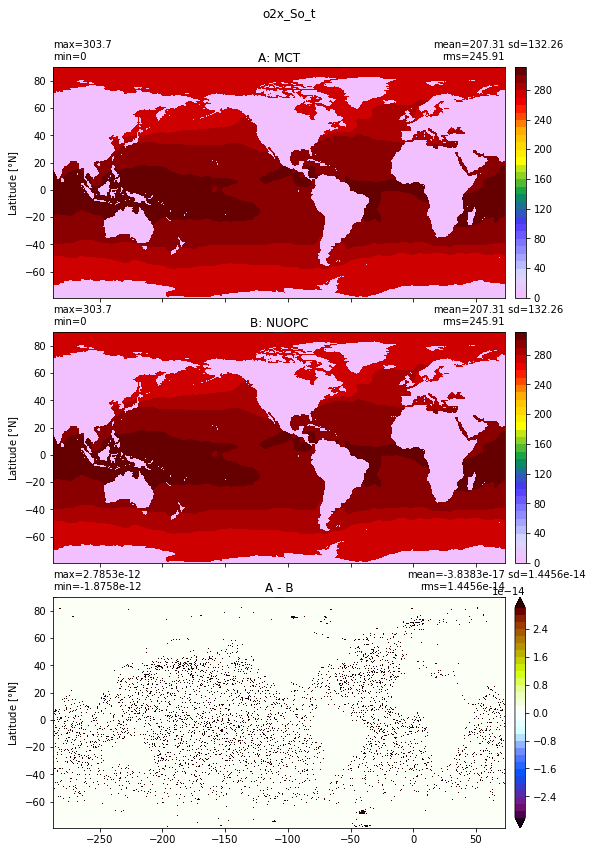

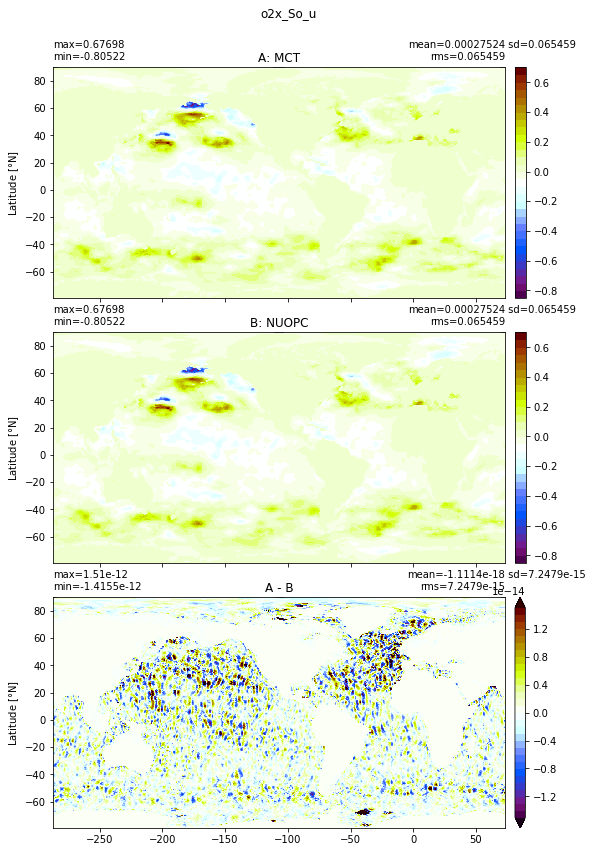

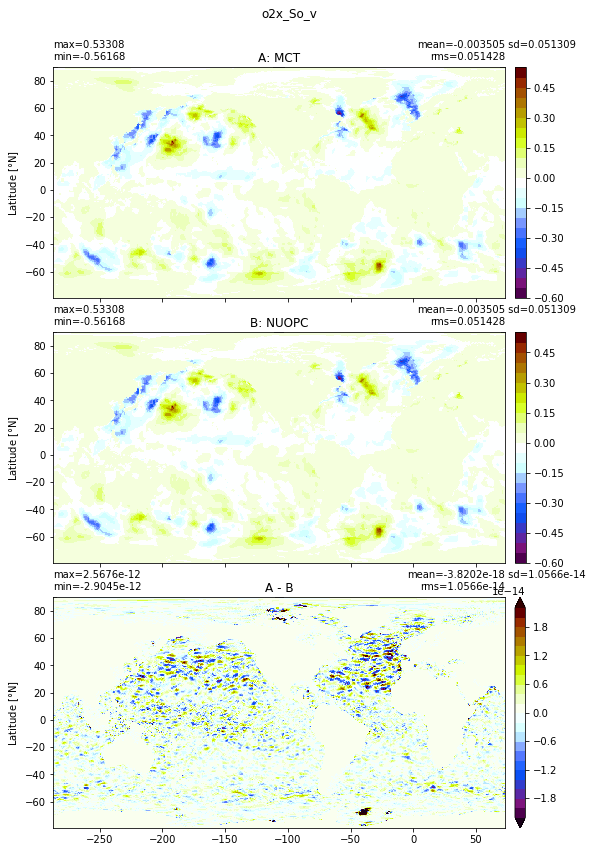

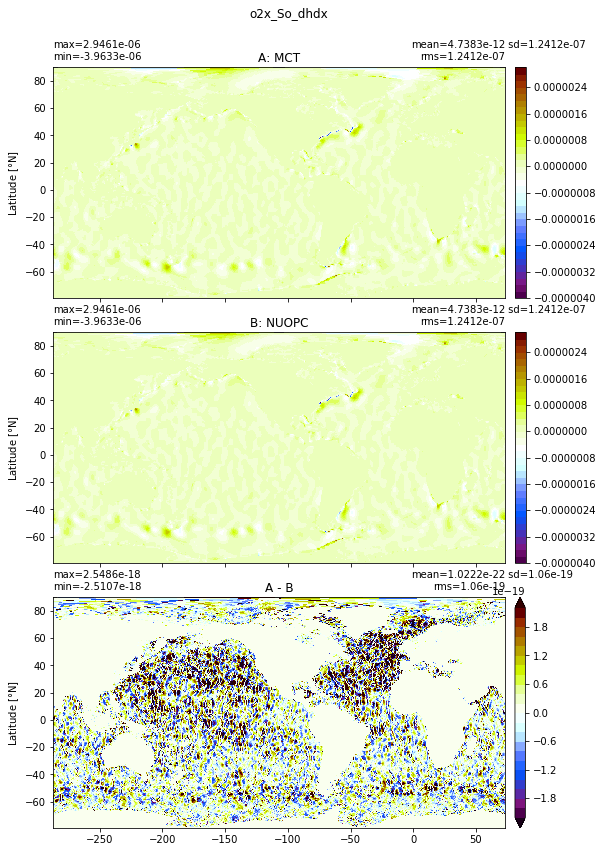

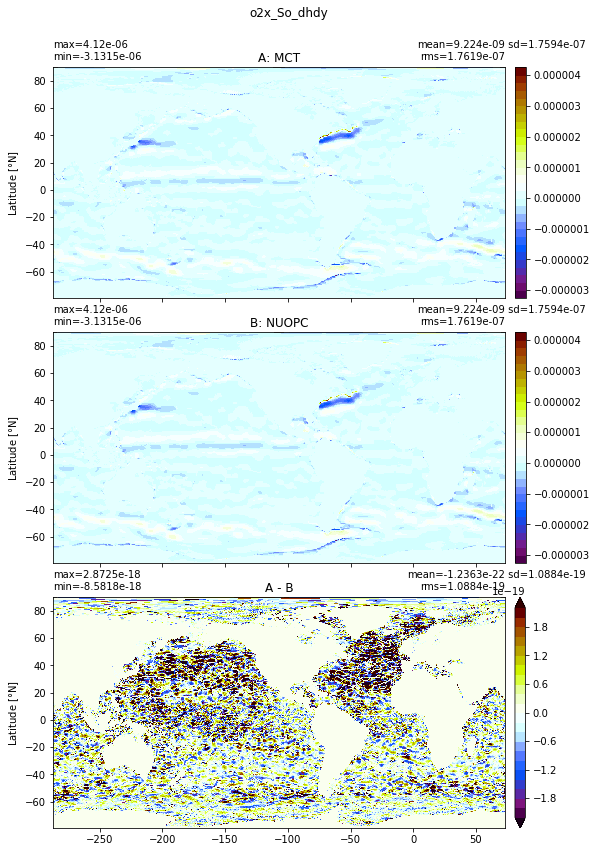

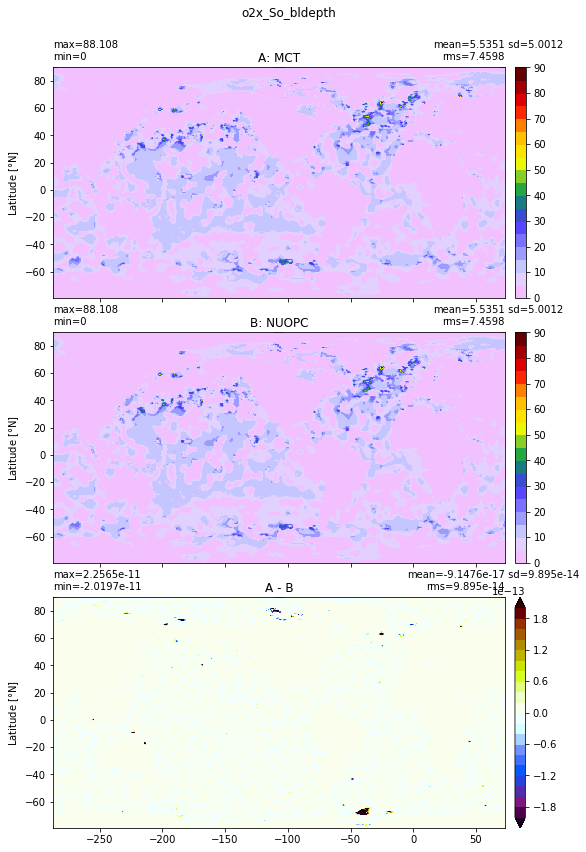

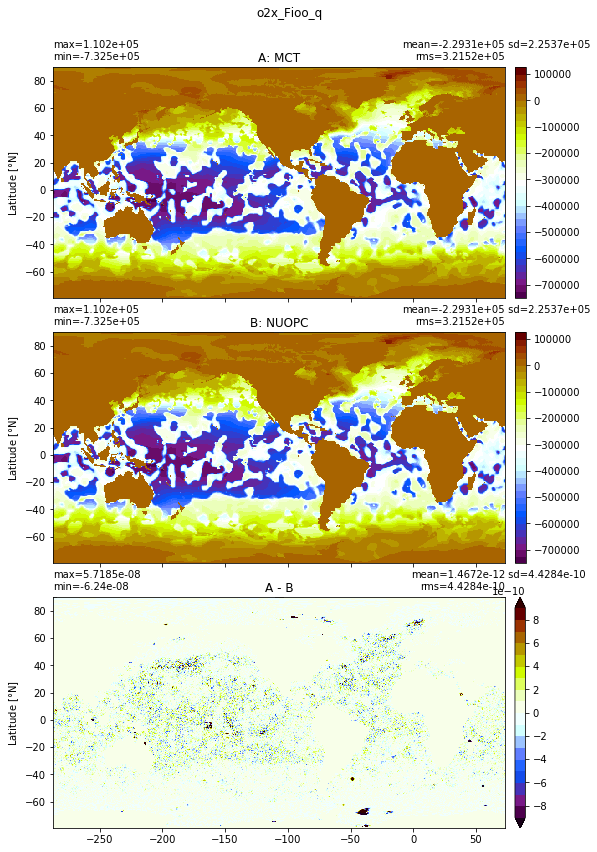

In [23]:
t = 0 # time indice
print('MCT time (days) = ',g1_mct_short['time'][t].data)
print('NUOPC time (days) = ',g1_npc_short['time'][t].data)

for p in range(len(pairs)):
    #print(pairs[p])
    nuopc_var = g1_npc_short[pairs[p][0]][t,:].data
    mct_var = g1_mct_short[pairs[p][1]][t,:].data
    xycompare(mct_var, nuopc_var, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle=pairs[p][1])

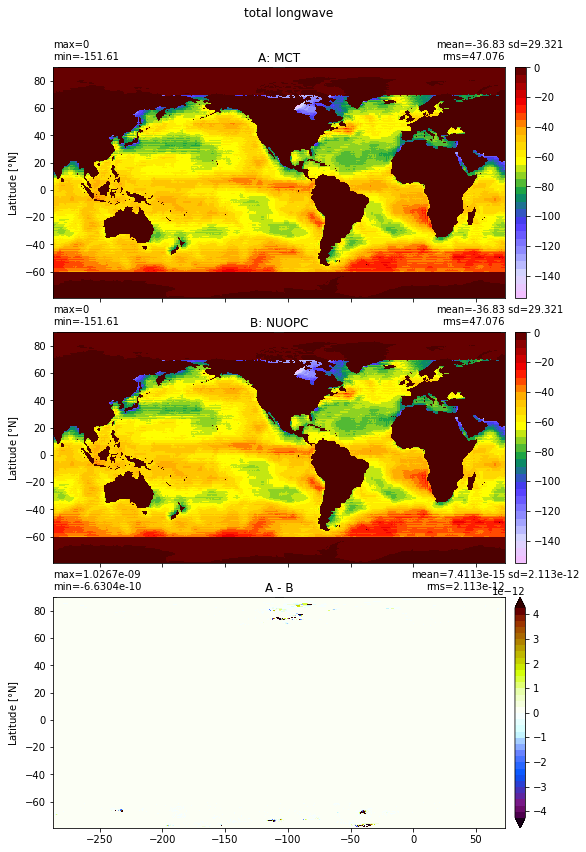

In [24]:
# longwave total
xycompare(g1_mct_short['x2oacc_Foxx_lwup'][t].data + g1_mct_short['x2oacc_Faxa_lwdn'][t].data, g1_npc_short['ocnExp_Foxx_lwnet'][t].data, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle='total longwave')

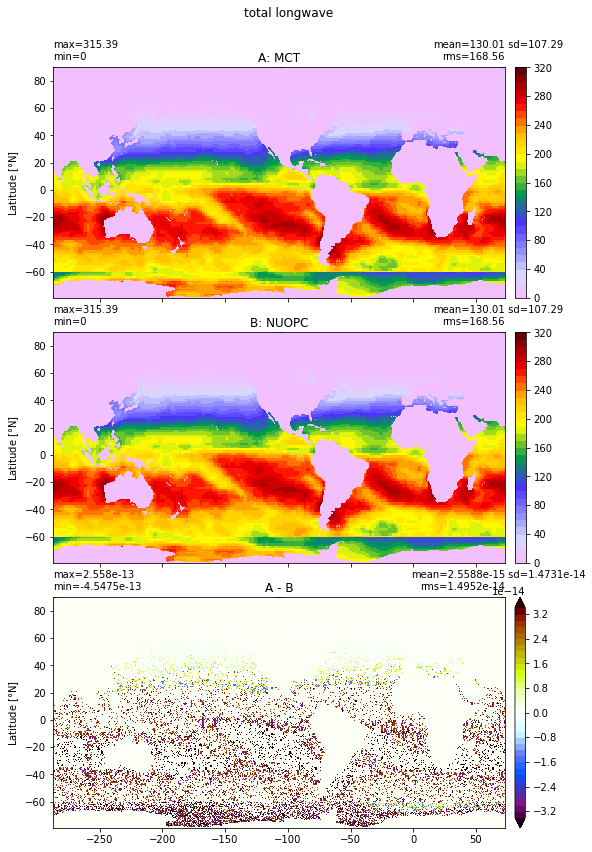

In [33]:
# SW total
SW = g1_npc_short['ocnExp_Foxx_swnet_idf'][t].data + g1_npc_short['ocnExp_Foxx_swnet_idr'][t].data + g1_npc_short['ocnExp_Foxx_swnet_vdf'][t].data + g1_npc_short['ocnExp_Foxx_swnet_vdr'][t].data 
xycompare(g1_mct_short['x2oacc_Foxx_swnet'][t].data, SW, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle='total longwave')

MCT time (hours) =  30.0
NUOPC time (hours) =  30.0


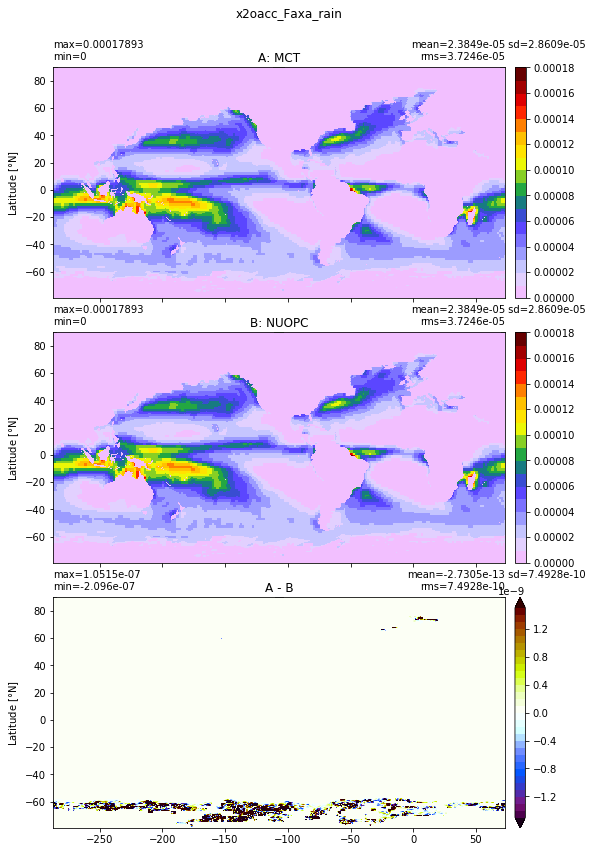

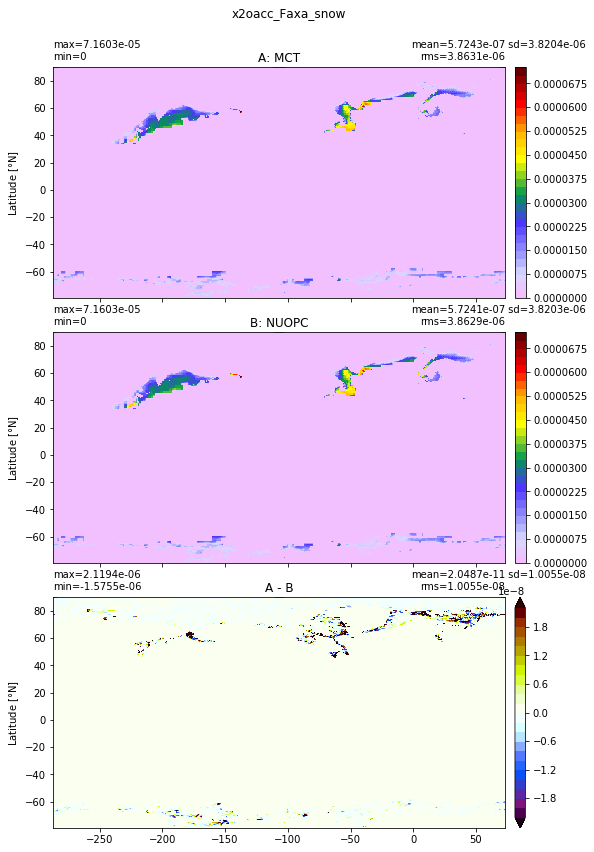

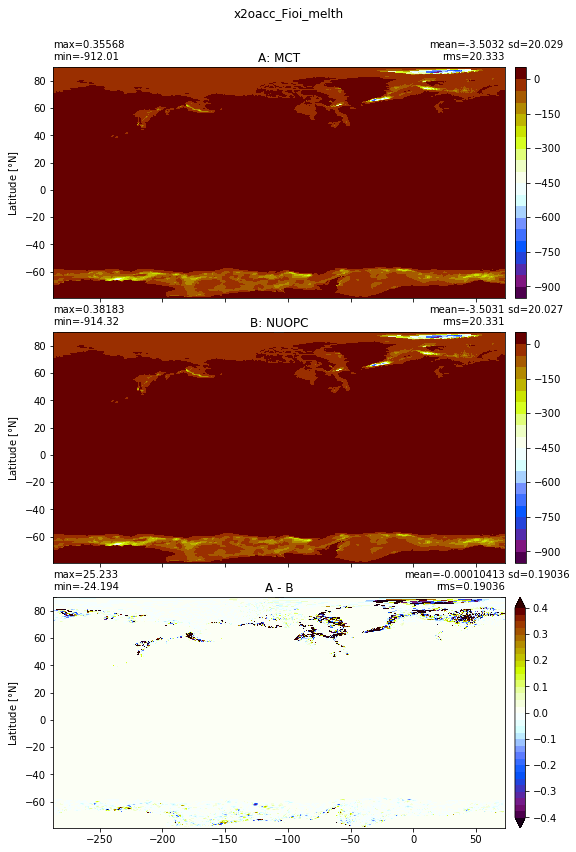

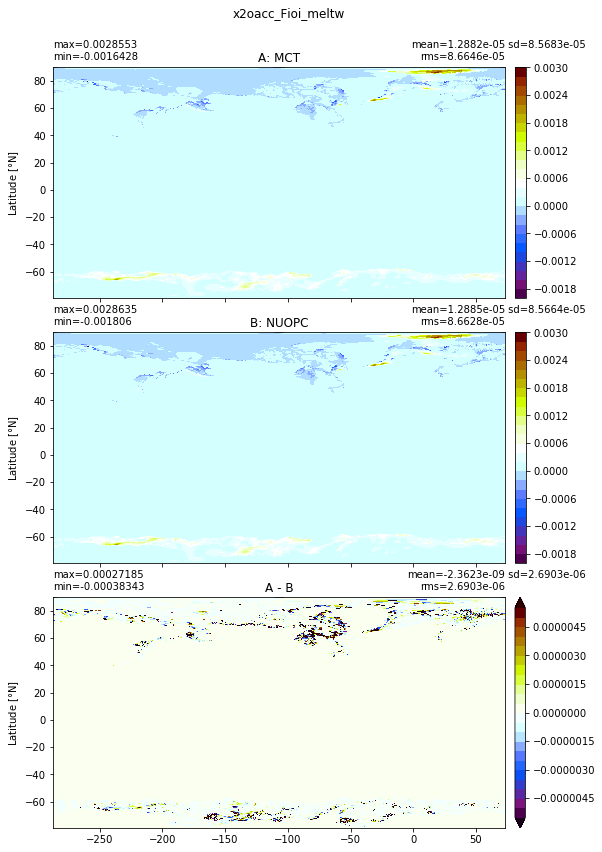

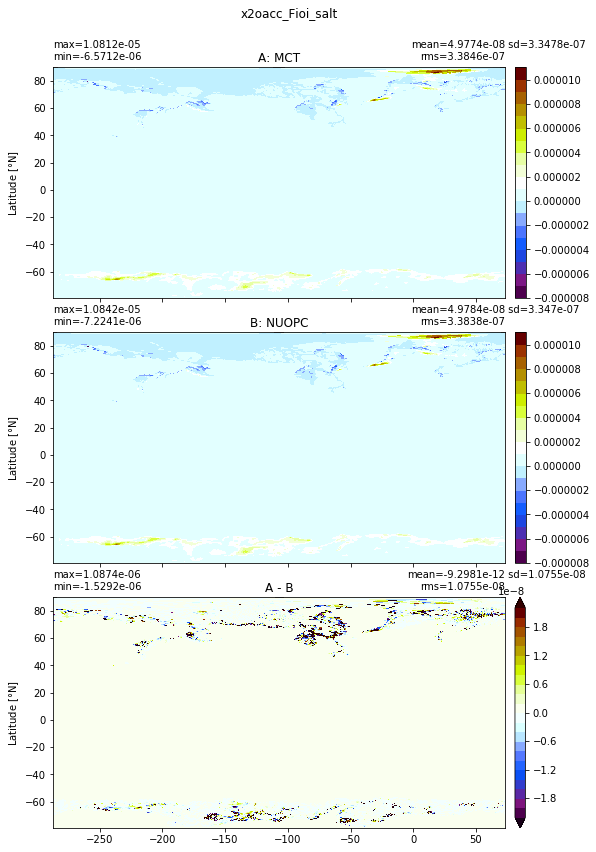

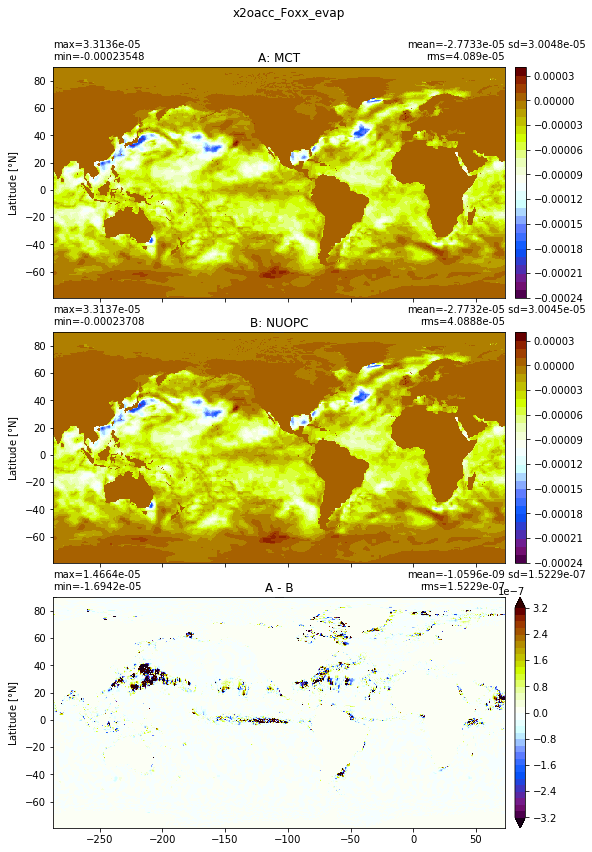

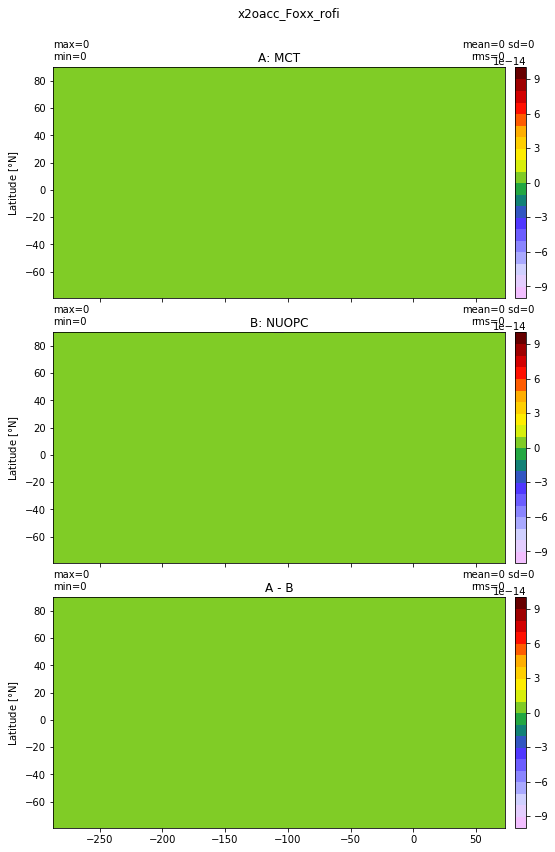

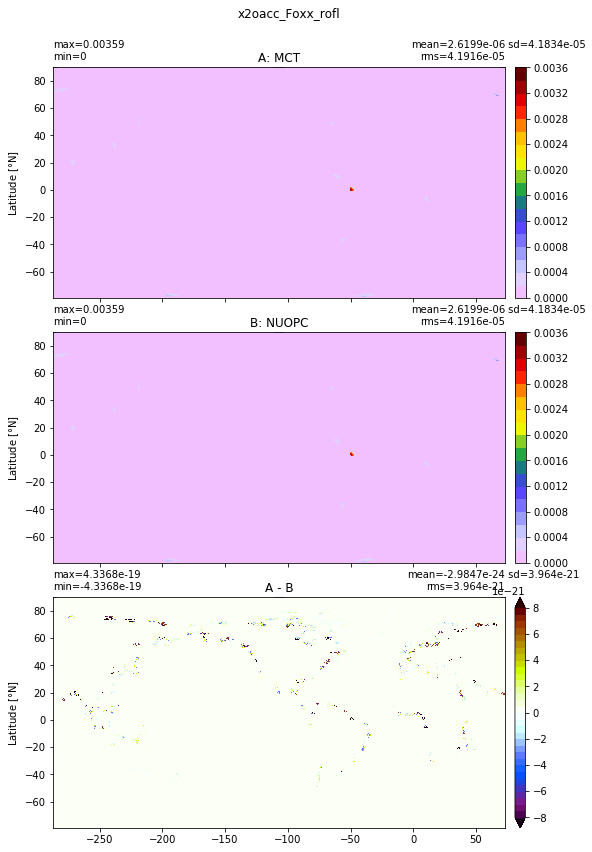

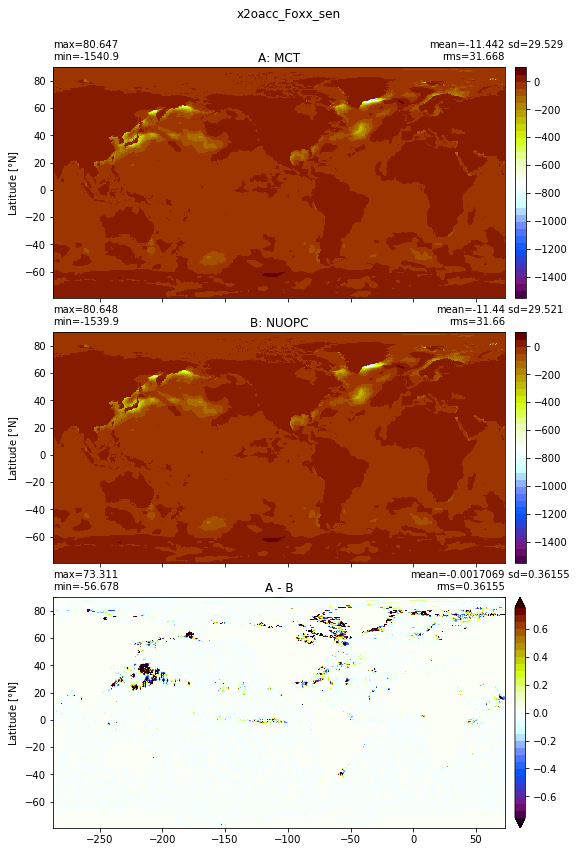

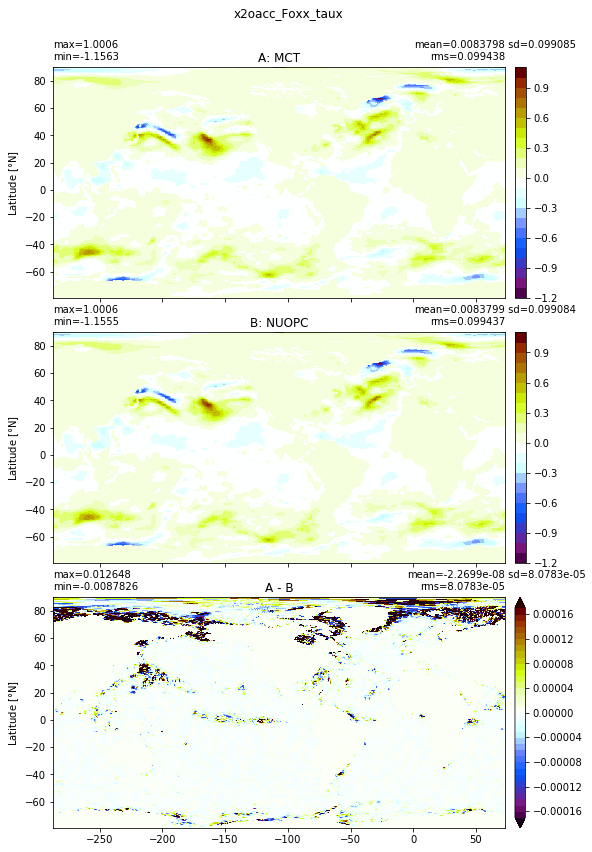

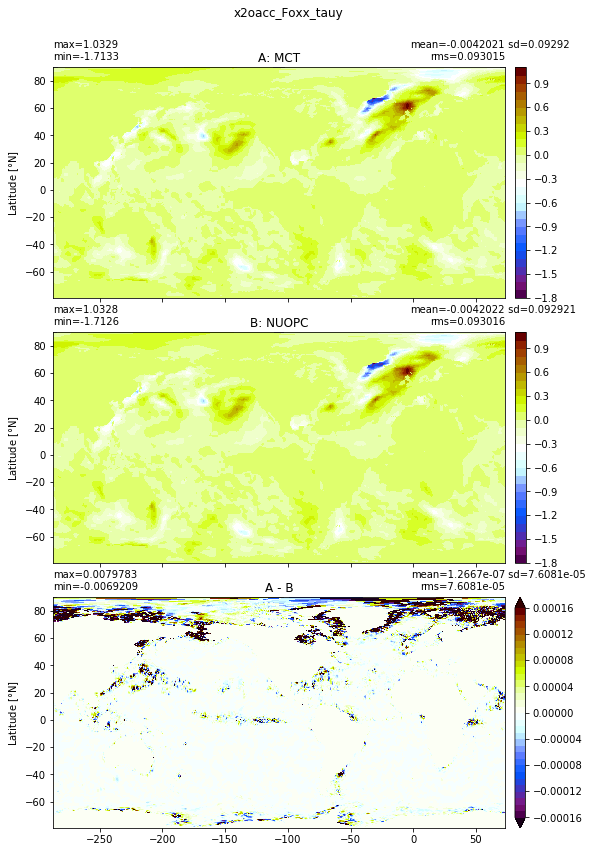

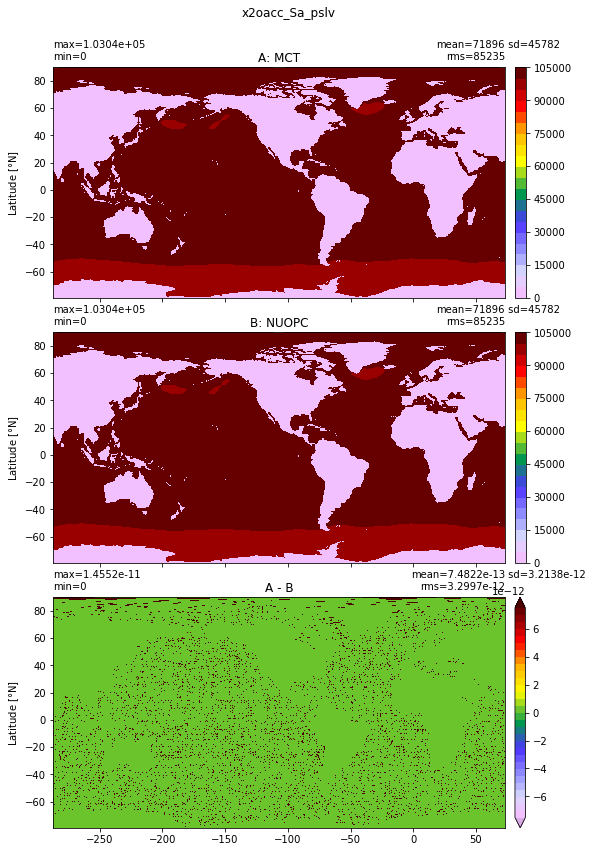

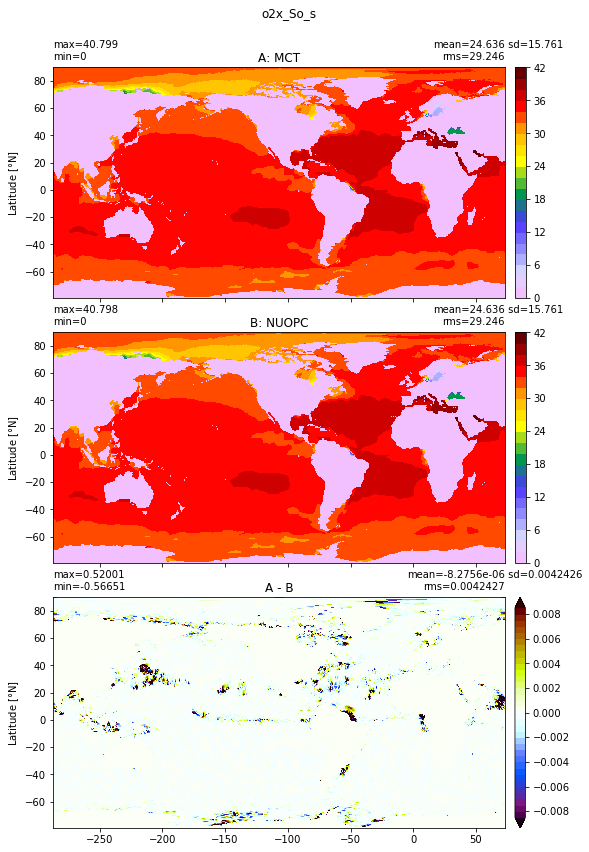

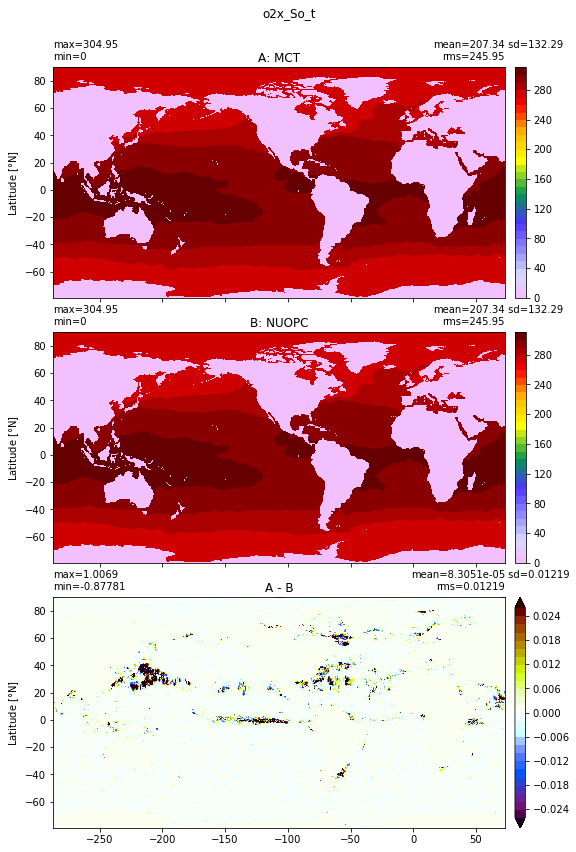

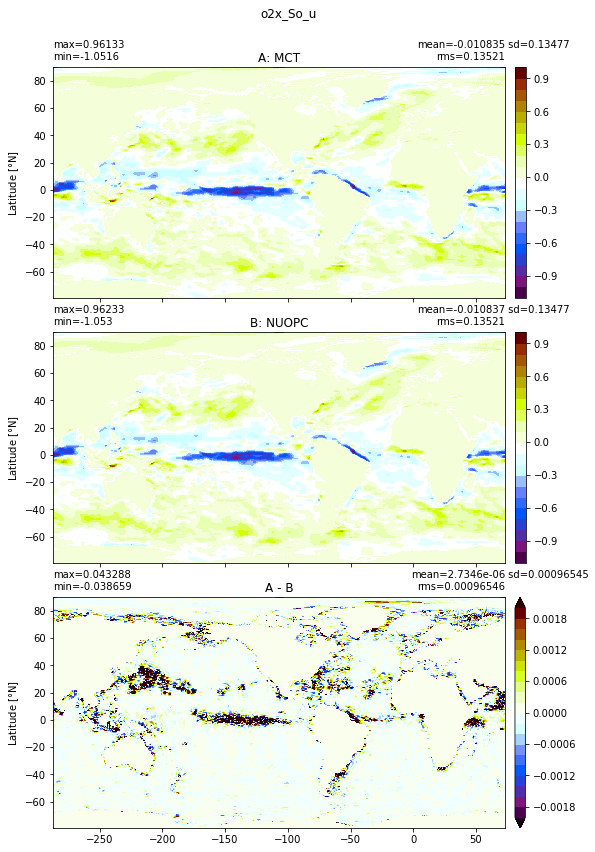

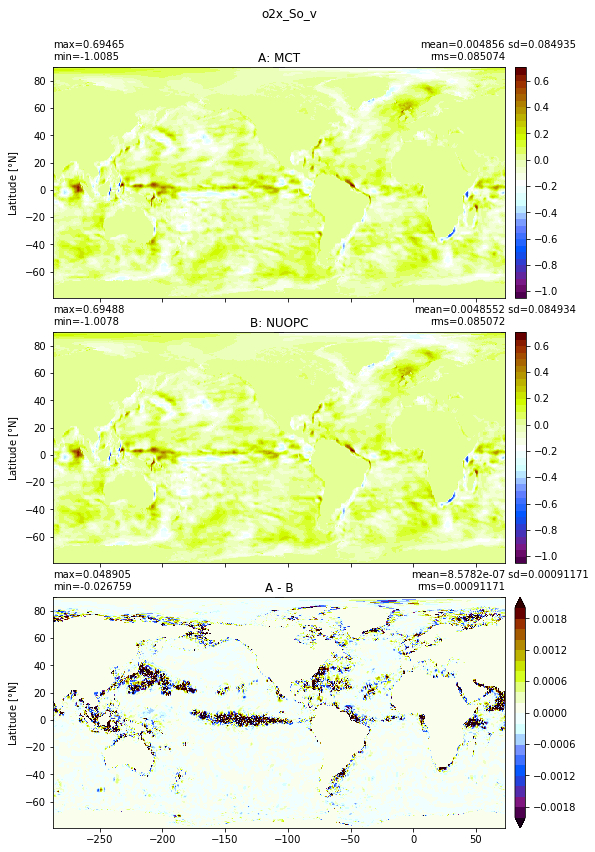

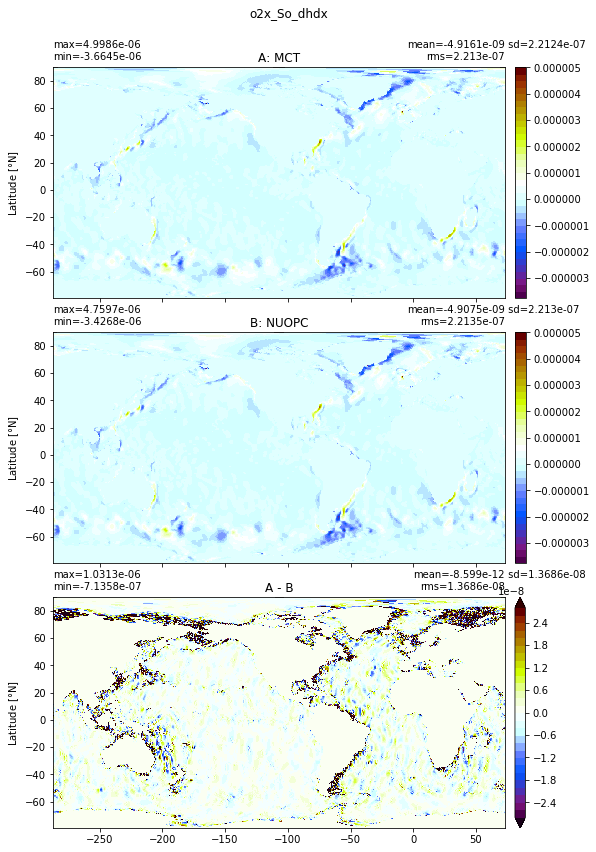

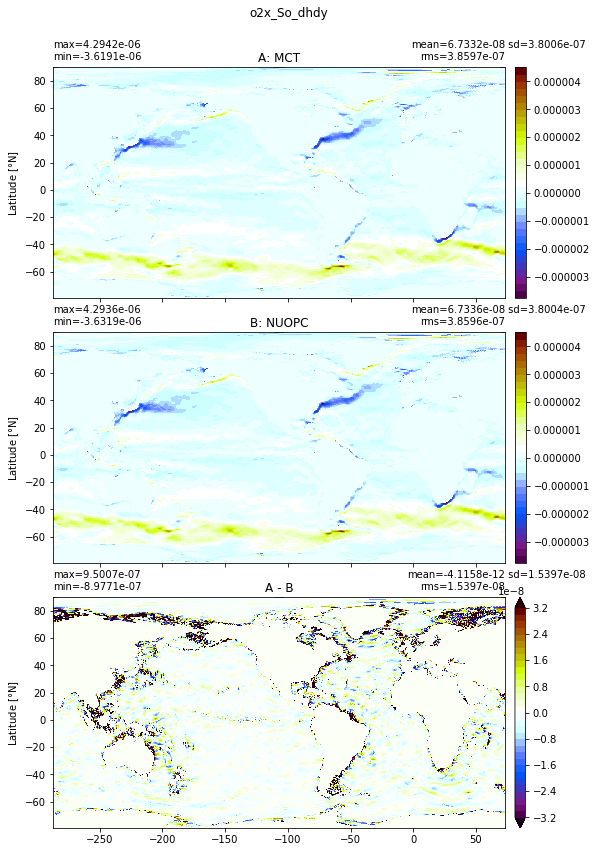

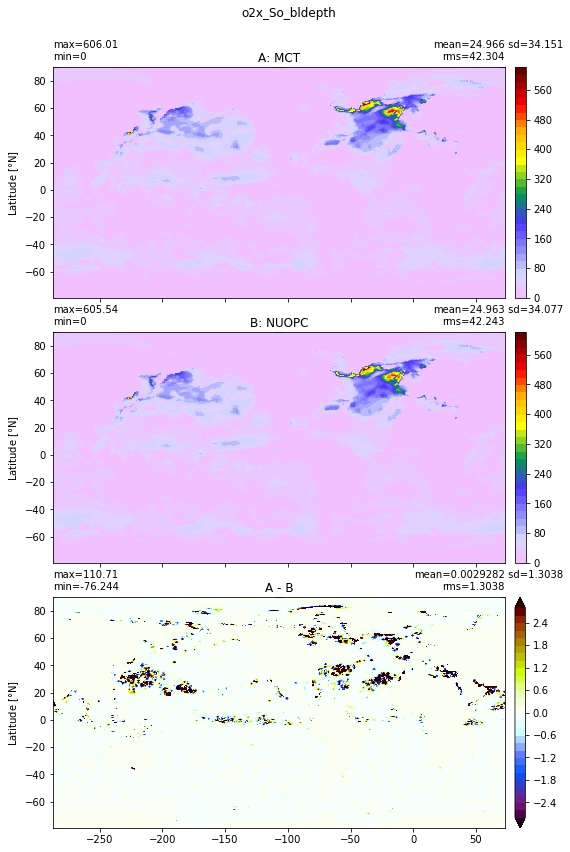

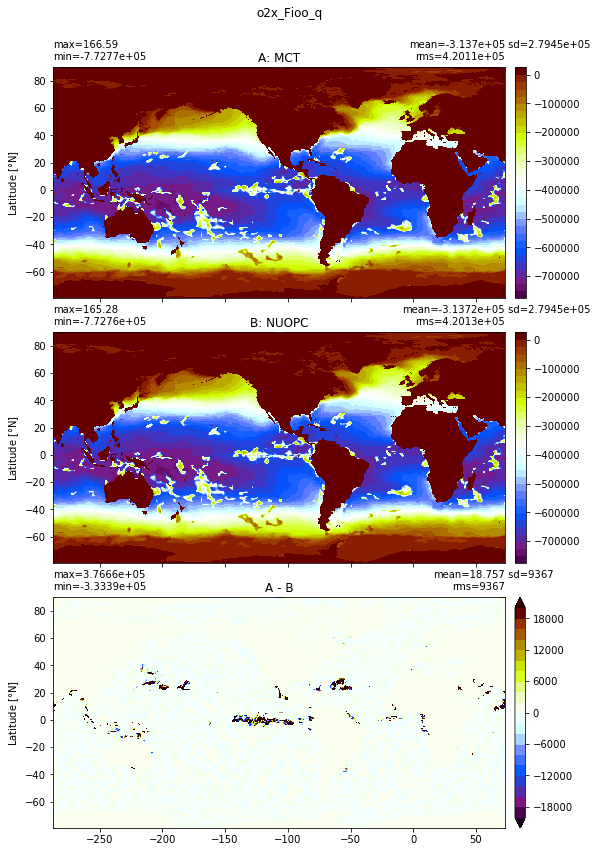

In [26]:
t = -1 # time indice
print('MCT time (hours) = ',g1_mct['time'][t].data)
print('NUOPC time (hours) = ',g1_npc['time'][t].data)

for p in range(len(pairs)):
    #print(pairs[p])
    nuopc_var = g1_npc[pairs[p][0]][t,:].data
    mct_var = g1_mct[pairs[p][1]][t,:].data
    xycompare(mct_var, nuopc_var, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle=pairs[p][1])

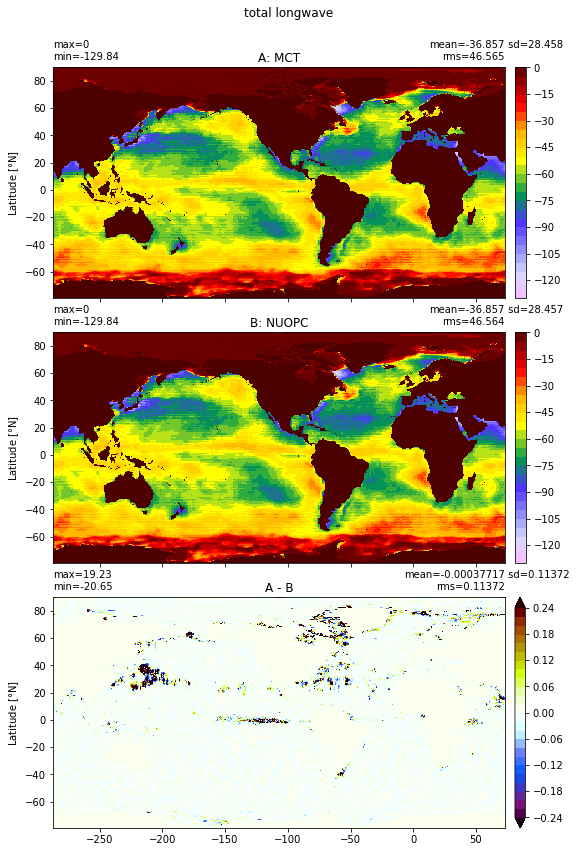

In [27]:
# longwave total
xycompare(g1_mct['x2oacc_Foxx_lwup'][t].data + g1_mct['x2oacc_Faxa_lwdn'][t].data, g1_npc['ocnExp_Foxx_lwnet'][t].data, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle='total longwave')

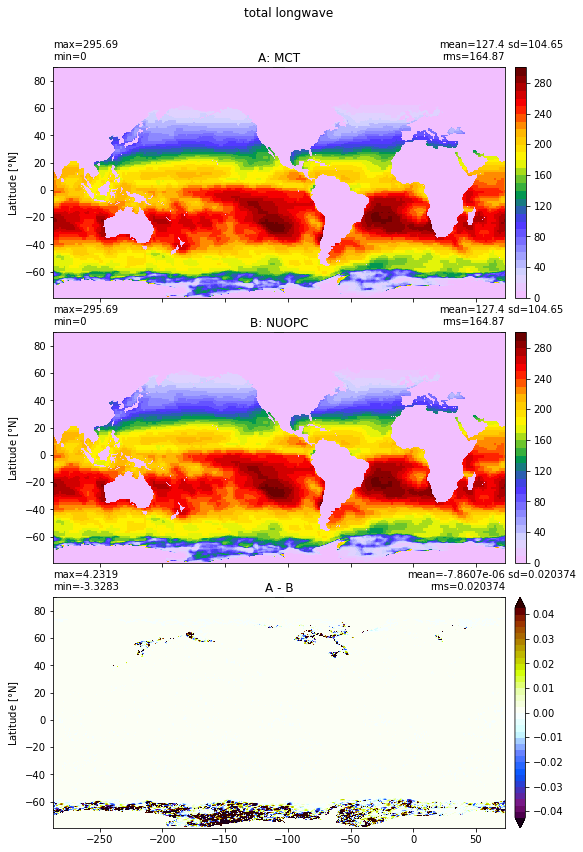

In [30]:
# SW total
SW = g1_npc['ocnExp_Foxx_swnet_idf'][t].data + g1_npc['ocnExp_Foxx_swnet_idr'][t].data + g1_npc['ocnExp_Foxx_swnet_vdf'][t].data + g1_npc['ocnExp_Foxx_swnet_vdr'][t].data 
xycompare(g1_mct['x2oacc_Foxx_swnet'][t].data, SW, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle='total longwave')